# Одномерная упругая система

In [58]:
# Проделаем аналитические выкладки, чтобы найти матрицу перехода в инварианты Римана

# Импорт используемых модулей
from sympy import Matrix, symbols, init_printing, diag, simplify
from sympy import sqrt as sympy_sqrt
init_printing()

# Упругая модель 1D (все неизвестные зависят только от переменных x,t)
# Убрали из рассмотрения Sigma_yy, т.к. она вычисляется однозначно по Sigma_xx
# q = (Vx, Vy, Sxx, Sxy)
rho, lam, mu = symbols("rho lambda mu")
print("Let's deal with 1D problem.")
A = Matrix([[0, 0, - 1 / rho, 0],
            [0, 0, 0, - 1 / rho],
            [-lam - 2 * mu, 0, 0, 0],
            [0, -mu, 0, 0]]
          ) # Создаём матрицу для 1D упругой задачи
print("The matrix A = ")
display(A)
l = A.eigenvals() # Вычисляем её собственные значения
print("It has four eigenvalues: ")
display(l)
e = A.eigenvects() # Вычисляем её собственные вектора
print("It has four eigenvectors: ")
display(e)
# У нас справедливо тождество A = Omega^(-1) * Lambda * Omega
Omega_inv = Matrix([[0, 0, 1 / sympy_sqrt(rho * (lam + 2 * mu)), -1 / sympy_sqrt(rho * (lam + 2 * mu))],
                   [1 / sympy_sqrt(rho * mu), -1 / sympy_sqrt(rho * mu), 0, 0],
                   [0, 0, 1, 1],
                   [1, 1, 0, 0]
                   ]
                  ) # Заполняем матрицу Omega^(-1)
Omega = Omega_inv.inv() # Вычисляем матрицу Omega
Lambda = diag(-sympy_sqrt(mu / rho), sympy_sqrt(mu / rho), -sympy_sqrt((lam + 2 * mu) / rho), sympy_sqrt((lam + 2 * mu) / rho)) # Заполняем матрицу Lambda
# Проверим разложение
print("Matrix of eigenvalues Lambda: ")
display(Lambda)
print("Omega^(-1) matrix: ")
display(Omega_inv)
print("Omega matrix: ")
display(Omega)
'''
print("Omega^(-1) * Lambda * Omega: ")
display(simplify(Omega_inv * Lambda * Omega))
print("Again, A: ")
display(A)
'''
v_x, v_y, s_xx, s_xy = symbols('v_x v_y s_{xx} s_{xy}')
q = Matrix([v_x, v_y, s_xx, s_xy])
print('q:')
display(q)
print('Omega * q:')
display(simplify(Omega * q))

Let's deal with 1D problem.
The matrix A = 


⎡              -1      ⎤
⎢   0      0   ───   0 ⎥
⎢               ρ      ⎥
⎢                      ⎥
⎢                   -1 ⎥
⎢   0      0    0   ───⎥
⎢                    ρ ⎥
⎢                      ⎥
⎢-λ - 2⋅μ  0    0    0 ⎥
⎢                      ⎥
⎣   0      -μ   0    0 ⎦

It has four eigenvalues: 


It has four eigenvectors: 


⎡⎛             ⎡⎡    0    ⎤⎤⎞  ⎛            ⎡⎡    0    ⎤⎤⎞  ⎛                 
⎢⎜             ⎢⎢         ⎥⎥⎟  ⎜            ⎢⎢         ⎥⎥⎟  ⎜                 
⎢⎜             ⎢⎢    1    ⎥⎥⎟  ⎜            ⎢⎢   -1    ⎥⎥⎟  ⎜                 
⎢⎜             ⎢⎢─────────⎥⎥⎟  ⎜            ⎢⎢─────────⎥⎥⎟  ⎜                 
⎢⎜     ___     ⎢⎢      ___⎥⎥⎟  ⎜    ___     ⎢⎢      ___⎥⎥⎟  ⎜     _________   
⎢⎜    ╱ μ      ⎢⎢     ╱ μ ⎥⎥⎟  ⎜   ╱ μ      ⎢⎢     ╱ μ ⎥⎥⎟  ⎜    ╱ λ   2⋅μ    
⎢⎜-  ╱  ─ , 1, ⎢⎢ρ⋅  ╱  ─ ⎥⎥⎟, ⎜  ╱  ─ , 1, ⎢⎢ρ⋅  ╱  ─ ⎥⎥⎟, ⎜-  ╱  ─ + ─── , 1
⎢⎜ ╲╱   ρ      ⎢⎢  ╲╱   ρ ⎥⎥⎟  ⎜╲╱   ρ      ⎢⎢  ╲╱   ρ ⎥⎥⎟  ⎜ ╲╱   ρ    ρ     
⎢⎜             ⎢⎢         ⎥⎥⎟  ⎜            ⎢⎢         ⎥⎥⎟  ⎜                 
⎢⎜             ⎢⎢    0    ⎥⎥⎟  ⎜            ⎢⎢    0    ⎥⎥⎟  ⎜                 
⎢⎜             ⎢⎢         ⎥⎥⎟  ⎜            ⎢⎢         ⎥⎥⎟  ⎜                 
⎣⎝             ⎣⎣    1    ⎦⎦⎠  ⎝            ⎣⎣    1    ⎦⎦⎠  ⎝                 

  ⎡⎡       1       ⎤⎤⎞  ⎛                  ⎡⎡      

Matrix of eigenvalues Lambda: 


⎡     ___                                        ⎤
⎢    ╱ μ                                         ⎥
⎢-  ╱  ─      0           0               0      ⎥
⎢ ╲╱   ρ                                         ⎥
⎢                                                ⎥
⎢              ___                               ⎥
⎢             ╱ μ                                ⎥
⎢   0        ╱  ─         0               0      ⎥
⎢          ╲╱   ρ                                ⎥
⎢                                                ⎥
⎢                        _________               ⎥
⎢                       ╱ λ + 2⋅μ                ⎥
⎢   0         0     -  ╱  ───────         0      ⎥
⎢                    ╲╱      ρ                   ⎥
⎢                                                ⎥
⎢                                       _________⎥
⎢                                      ╱ λ + 2⋅μ ⎥
⎢   0         0           0           ╱  ─────── ⎥
⎣                                   ╲╱      ρ    ⎦

Omega^(-1) matrix: 


⎡                         1               -1       ⎤
⎢   0        0     ───────────────  ───────────────⎥
⎢                    _____________    _____________⎥
⎢                  ╲╱ ρ⋅(λ + 2⋅μ)   ╲╱ ρ⋅(λ + 2⋅μ) ⎥
⎢                                                  ⎥
⎢   1       -1                                     ⎥
⎢───────  ───────         0                0       ⎥
⎢  _____    _____                                  ⎥
⎢╲╱ μ⋅ρ   ╲╱ μ⋅ρ                                   ⎥
⎢                                                  ⎥
⎢   0        0            1                1       ⎥
⎢                                                  ⎥
⎣   1        1            0                0       ⎦

Omega matrix: 


⎡                      _____           ⎤
⎢                    ╲╱ μ⋅ρ            ⎥
⎢        0           ───────    0   1/2⎥
⎢                       2              ⎥
⎢                                      ⎥
⎢                      _____           ⎥
⎢                   -╲╱ μ⋅ρ            ⎥
⎢        0          ─────────   0   1/2⎥
⎢                       2              ⎥
⎢                                      ⎥
⎢   _____________                      ⎥
⎢ ╲╱ λ⋅ρ + 2⋅μ⋅ρ                       ⎥
⎢ ───────────────       0      1/2   0 ⎥
⎢        2                             ⎥
⎢                                      ⎥
⎢   _____________                      ⎥
⎢-╲╱ λ⋅ρ + 2⋅μ⋅ρ                       ⎥
⎢─────────────────      0      1/2   0 ⎥
⎣        2                             ⎦

q:


⎡     vₓ     ⎤
⎢            ⎥
⎢    v_y     ⎥
⎢            ⎥
⎢{sigma}_{xx}⎥
⎢            ⎥
⎣   σ_{xy}   ⎦

Omega * q:


⎡                      _____        ⎤
⎢       σ_{xy}   v_y⋅╲╱ μ⋅ρ         ⎥
⎢       ────── + ───────────        ⎥
⎢         2           2             ⎥
⎢                                   ⎥
⎢                      _____        ⎥
⎢       σ_{xy}   v_y⋅╲╱ μ⋅ρ         ⎥
⎢       ────── - ───────────        ⎥
⎢         2           2             ⎥
⎢                                   ⎥
⎢      _____________                ⎥
⎢ vₓ⋅╲╱ ρ⋅(λ + 2⋅μ)    {sigma}_{xx} ⎥
⎢ ────────────────── + ──────────── ⎥
⎢         2                 2       ⎥
⎢                                   ⎥
⎢       _____________               ⎥
⎢  vₓ⋅╲╱ ρ⋅(λ + 2⋅μ)    {sigma}_{xx}⎥
⎢- ────────────────── + ────────────⎥
⎣          2                 2      ⎦

In [55]:
from sympy import solve
w_1, w_2, w_3, w_4 = symbols('w_1 w_2 w_3 w_4')
w = Matrix([w_1, w_2, w_3, w_4])
print("Действие оператора Omega^(-1) на вектор [w_1, w_2, w_3, w_4] имеет вид: ")
display(Omega_inv * w)

print('Зададим физическое условие (свободная граница):')
print('sxx^(n+1) == 0,\tsxy^(n+1) == 0')

print('\nПравая граница:')
print("Физическое условие запишется в виде:\nw_3 ==")
sol1 = solve((Omega_inv * w)[2], w_3)
display(sol1[0])
print('w_1 ==')
sol2 = solve((Omega_inv * w)[3], w_1)
display(sol2[0])
print("Тогда итоговые формулы на правой границе примут вид:")
B = ((Omega_inv * w).subs(w_3, sol1[0])).subs(w_1, sol2[0])
display(B)

print('\nЛевая граница:')
print("Физическое условие запишется в виде:\nw_4 ==")
sol1 = solve((Omega_inv * w)[2], w_4)
display(sol1[0])
print('w_2 ==')
sol2 = solve((Omega_inv * w)[3], w_2)
display(sol2[0])
print("Тогда итоговые формулы на левой границе примут вид:")
B = ((Omega_inv * w).subs(w_4, sol1[0])).subs(w_2, sol2[0])
display(B)

Действие оператора Omega^(-1) на вектор [w_1, w_2, w_3, w_4] имеет вид: 


⎡       w₃                w₄      ⎤
⎢─────────────── - ───────────────⎥
⎢  _____________     _____________⎥
⎢╲╱ ρ⋅(λ + 2⋅μ)    ╲╱ ρ⋅(λ + 2⋅μ) ⎥
⎢                                 ⎥
⎢           w₁        w₂          ⎥
⎢        ─────── - ───────        ⎥
⎢          _____     _____        ⎥
⎢        ╲╱ μ⋅ρ    ╲╱ μ⋅ρ         ⎥
⎢                                 ⎥
⎢             w₃ + w₄             ⎥
⎢                                 ⎥
⎣             w₁ + w₂             ⎦

Зададим физическое условие (свободная граница):
sxx^(n+1) == 0,	sxy^(n+1) == 0

Правая граница:
Физическое условие запишется в виде:
w_3 ==


w_1 ==


Тогда итоговые формулы на правой границе примут вид:


⎡     -2⋅w₄     ⎤
⎢───────────────⎥
⎢  _____________⎥
⎢╲╱ ρ⋅(λ + 2⋅μ) ⎥
⎢               ⎥
⎢     -2⋅w₂     ⎥
⎢    ───────    ⎥
⎢      _____    ⎥
⎢    ╲╱ μ⋅ρ     ⎥
⎢               ⎥
⎢       0       ⎥
⎢               ⎥
⎣       0       ⎦


Левая граница:
Физическое условие запишется в виде:
w_4 ==


w_2 ==


Тогда итоговые формулы на левой границе примут вид:


⎡      2⋅w₃     ⎤
⎢───────────────⎥
⎢  _____________⎥
⎢╲╱ ρ⋅(λ + 2⋅μ) ⎥
⎢               ⎥
⎢      2⋅w₁     ⎥
⎢    ───────    ⎥
⎢      _____    ⎥
⎢    ╲╱ μ⋅ρ     ⎥
⎢               ⎥
⎢       0       ⎥
⎢               ⎥
⎣       0       ⎦

In [ ]:
'''
Правая граница:
w1 = -2 * w_4 / np.sqrt(rho * (lam + 2 * mu))
w2 = -2 * w_2 / np.sqrt(mu * rho)

Левая граница
w1 = 2 * w_3 / np.sqrt(rho * (lam + 2 * mu))
w2 = 2 * w_1 / np.sqrt(mu * rho)
'''

Скорость продольной волны 0.7071067811865476 м/с
Скорость поперечной волны 0.408248290463863 м/с


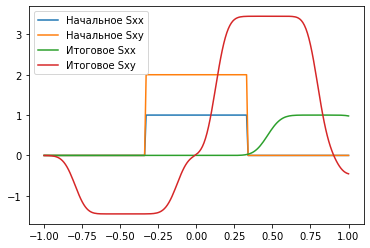

In [54]:
# Импортируем numpy для хранения результатов расчётов
import numpy as np

# Импортируем модуль matplolib для визуализации результатов
import matplotlib.pyplot as plt

# Определим параметры 1D упругой задачи
L = 2.0 # x = [-1,1]
rho = 6.0 # плотность в кг/м^3
lam = 1.0 # sqrt((lam + 2 * mu) / rho) - скорость P волны в м/с
mu = 1.0 # sqrt(mu / rho) - скорость S волны в м/с
Cp = np.sqrt((lam + 2.0 * mu) / rho)
Cs = np.sqrt(mu / rho)
print("Скорость продольной волны", Cp, "м/с")
print("Скорость поперечной волны", Cs, "м/с")
T = 0.4 * L / Cp # время моделирования
M = 201 # количество узлов вдоль оси
h = L / M # шаг по координате, h
dt = 0.4 * h / Cp # коэффициент должен быть меньше единицы
# В каждом узле мы храним значение давления и скорости среды
data_current = np.zeros(M, dtype=[('vx', np.float64), ('vy', np.float64),
                                  ('sxx', np.float64), ('sxy', np.float64)])
data_next = np.zeros(M, dtype=[('vx', np.float64), ('vy', np.float64),
                                  ('sxx', np.float64), ('sxy', np.float64)])

# Определим теперь функции, которые на основании Omega и Omega^(-1) умеют нам возвращать трансформированный вектор
def Omega(q):
    vx, vy, sxx, sxy = q
    return (np.sqrt(mu * rho) / 2.0 * vy + sxy / 2.0,
            -np.sqrt(mu * rho) / 2.0 * vy + sxy / 2.0,
            np.sqrt(rho * (lam + 2.0 * mu)) / 2.0 * vx + sxx / 2.0,
            -np.sqrt(rho * (lam + 2.0 * mu)) / 2.0 * vx + sxx / 2.0
           )

def OmegaInv(w1, w2, w3, w4):
    return (1.0 / np.sqrt(rho * (lam + 2.0 * mu)) * w3 - 1.0 / np.sqrt(rho * (lam + 2.0 * mu)) * w4,
            1.0 / np.sqrt(mu * rho) * w1 - 1.0 / np.sqrt(mu * rho) * w2,
            w3 + w4,
            w1 + w2
           )

# Начальные значения
for i in range(int(1.0 / 3.0 * M), int(2.0 / 3.0 * M)):
    # В виде продольной волны (P)
    data_current[i]['sxx'] = 1.0
    data_current[i]['vx']  = - data_current[i]['sxx'] / np.sqrt(rho * (lam + 2.0 * mu))
    # В виде поперечной/ np.sqrt(rho * mu) волны (S)
    data_current[i]['sxy'] = 2.0
    data_current[i]['vy']  = - data_current[i]['sxy'] 

# Рисуем график до начала расчёта
x_m = np.linspace(-1.0, L - 1.0, M)
plt.plot(x_m, data_current['sxx'], label="Начальное Sxx")
plt.plot(x_m, data_current['sxy'], label="Начальное Sxy")
for j in range(int(T / dt)):
    for i in range(M):
        # w1 for -Cs, w2 for +Cs, w3 for -Cp, w4 for +Cp
        # Переходим в инварианты Римана
        w1, w2, w3, w4   = Omega(data_current[i])
        if i == 0: # Левая граница области
            w1n, w2n, w3n, w4n = Omega(data_current[i + 1])
            w1p = 2 * w3n / np.sqrt(rho * (lam + 2 * mu))
            w2p = 2 * w1n / np.sqrt(mu * rho)
            w3p, w4p = 0, 0
        elif i == M - 1: # Правая граница области
            w1p, w2p, w3p, w4p = Omega(data_current[i - 1])
            w1n = -2 * w4p / np.sqrt(rho * (lam + 2 * mu))
            w2n = -2 * w2p / np.sqrt(mu * rho)
            w3n, w4n = 0, 0
        else: # Внутри области
            w1p, w2p, w3p, w4p = Omega(data_current[i - 1])
            w1n, w2n, w3n, w4n = Omega(data_current[i + 1])
        # Решаем уравнения переноса на инварианты (правильно-сторонний шаблон)
        w1_new = w1 + Cs * dt / h * (w1n - w1)
        w2_new = w2 - Cs * dt / h * (w2 - w2p)
        w3_new = w3 + Cp * dt / h * (w3n - w3)
        w4_new = w4 - Cp * dt / h * (w4 - w4p)
        # Возвращаемся в исходные переменные
        data_next[i]['vx'], data_next[i]['vy'], data_next[i]['sxx'], data_next[i]['sxy']= OmegaInv(w1_new, w2_new, w3_new, w4_new)
    # Обновляем весь слой
    for i in range(M):
        data_current[i] = data_next[i]
    
# Рисуем график по окончанию расчёта
plt.plot(x_m, data_current['sxx'], label="Итоговое Sxx")
plt.plot(x_m, data_current['sxy'], label="Итоговое Sxy")
plt.legend()
plt.show()